<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Projeto_Machine_Learning_Previs%C3%A3o_de_AVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Projeto Machine Learning - Previsão de AVC

O AVC é o entupimento ou rompimento dos vasos que levam sangue ao cérebro, provocando a paralisia da região afetada no cérebro. Também é chamado de acidente vascular cerebral, derrame cerebral ou Acidente Vascular Encefálico (AVE).

<p align=center>
<img src="https://image.freepik.com/free-photo/headache-representation_1048-1857.jpg" width="40%"></p>

O acidente vascular cerebral (AVC) é a doença que mais mata no Brasil e a que mais causa incapacidade no mundo: cerca de 70% das pessoas que sofrem um derrame não retorna ao trabalho depois do acidente vascular cerebral e 50% ficam dependentes de outras pessoas no dia a dia. Apesar desses números preocupantes, muita gente ainda têm dúvidas sobre o assunto e desconhece as principais causas, sintomas e maneiras de prevenir essa enfermidade.

O AVC acontece quando o suprimento de sangue que vai para o cérebro é interrompido ou drasticamente reduzido, privando as cédulas de oxigênio e de nutrientes. Ou, então, quando um vaso sanguíneo se rompe, causando uma hemorragia cerebral. Entre as causas dessas ocorrências, estão a malformação arterial cerebral (aneurisma), hipertensão arterial, cardiopatia, tromboembolia (bloqueio da artéria pulmonar).

Existem dois tipos de AVC: O AVC isquêmico e o AVC hemorrágico.

**Neste trabalho vamos montar um modelo de previsão para ajudar os profissionais da saúde a detectarem pacientes que possam vir a sofrer um AVC e desse modo tentar salva-los a tempo de não sofrerem consequências mais graves.**




## Aquisição dos Dados

Os dados deste trabalho foram adquiridos do [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). Lá você encontra esse e outros datasets muito interessantes para fazer projetos como esse ou até participar de competições entre cientistas de dados.

**Informação das variáveis:**
* id: identificador;
* gender: "Masculino", "Feminino" ou "outro";
* age: idade do paciente;
* hypertension: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão;
* heart_disease: 0 se o paciente não tem doenças cardíacas, 1 se o paciente tem doença cardíaca;
* ever_married: nunca se casou, "não" ou "sim";
* work_type: tipo de trabalho, "crianças", "governo", "nunca trabalhou", "privado" or "autônomo";
* Residence_type: tipo da residência,  "Rural" ou "Urbana";
* avg_glucose_level: nível médio de glicose no sangue;
* bmi: índice de massa corporal;
* smoking_status: relação com o cigarro, "já fumou", "nunca fumou", "fuma" ou "desconhecido";
* stroke: 1 se o paciente teve um AVC ou 0 se não teve um AVC;
* **Note:** "Unknown" na variável 'smoking_status' significa que essa informação não é conhecida.

**O objetivo principal do trabalho é: Montar um modelo de machine learning que faça previsões para pacientes que possam ter um AVC.**

In [ ]:
# Importar os pacotes necessários.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/healthcare-dataset-stroke-data.csv")

## Análise exploratória dos dados

Nesta primeira etapa do trabalho, o objetivo principal é fazer uma análise completa de toda a informação que conseguirmos extrair do conjunto de dados em questão, como por exemplo fazer diversas análises estatísticas; Verificar outliers e valores ausentes que possam estar presentes; Verificar a correlação entre as variáveis; Analisar gráficos, entre outros.

Após ter as informações que precisamos, vamos partir para uma segunda etapa que é a de limpeza e tratamento dos dados, cujo os detalhes serão abordados posteriormente.

**Para tornar a análise exploratória simples de entender vamos dividir as tarefas em tópicos e ir detalhando uma a uma.**

* Verificar as 05 primeiras entradas do dataset:

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Note que apenas com esse comando, conseguimos ter uma visão geral do nosso dataset, identificando nossas variáveis (colunas) e nossas entradas (linhas) e assim já conseguindo obter alguns insights de como proceder com esse dataset.

* Verificar os tipos das variáveis e tamanho do dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Com esse comando, conseguimos ver que o nosso dataset possui 5510 entradas e 12 colunas. Conseguimos perceber os tipos das variáveis (int, float ou object) e já obter alguns insights, pois, vamos precisar trocar os tipos das variáveis 'object' para 'int' na etapa de preparação e limpeza dos dados.

* Verificar o resumo estatístico do dataframe:

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Com esse comando conseguimos ver uma distribuição estatística completa do nosso dataset, como a média, desvio padrão, os valores mínimos e máximos, e as distribuições dos valores nos quartis. Esse dataset não parece ter nenhum outlier, pois, não vemos valores tão discrepantes. Vamos plotar um gráfico boxplot para termos outra visão e tentar detectar algum outlier.

* Gráfico boxplot:

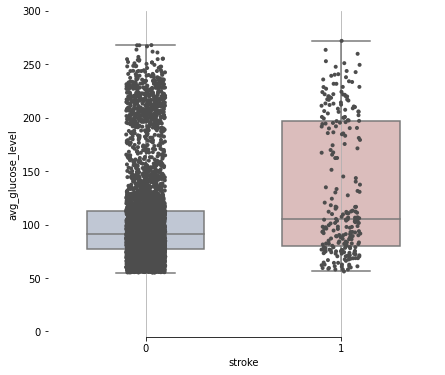

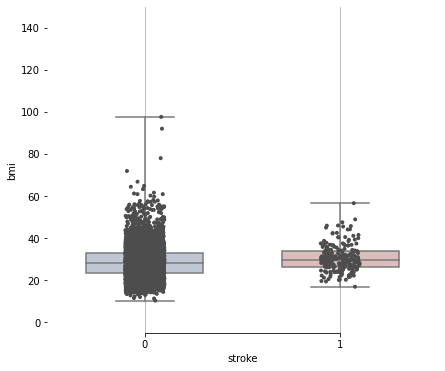

In [ ]:
# Plotar bloxplot para análise de outliers
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="stroke", y="avg_glucose_level", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-5, 300))
sns.stripplot(x="stroke", y="avg_glucose_level", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="avg_glucose_level")
sns.despine(trim=True, left=True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="stroke", y="bmi", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-5, 150))
sns.stripplot(x="stroke", y="bmi", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="bmi")
sns.despine(trim=True, left=True)


Com esse boxplots, conseguimos corroborar a nossa ideia anterior de que esse dataset não possuia nenhum outlier, realmente não há nenhum ponto com valor discrepante que poderia vir a diminuir o desempenho do nosso modelo.

Vamos agora verificar as entradas únicas de cada coluna para obter algum insight.

* Analisar as entradas das variáveis:

In [ ]:
# Verificar os valores únicos de cada coluna
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
gender                  3
smoking_status          4
work_type               5
age                   104
bmi                   418
avg_glucose_level    3979
id                   5110
dtype: int64


Com esse comando conseguimos ver quantas entradas diferentes cada coluna possui. As colunas 'age', 'bmi', 'avg_glucose_level' e 'id' possuem valores numéricos contínuos e por isso elas possuem essa grande quantidade de valores nas entradas. Já as variáveis 'hypertension', 'heart_disease', 'ever_married', 'residence_type', 'stroke', 'gender', 'smoking_status' e 'work_type' possuem valores numéricos discretos e por isso essa pequena quantidade de valores.

Conseguimos já obter alguns insights como por exemplo, alterar as colunas que possuem valores discretos e normalizar as colunas que possuem valores contínuos. Na etapa de preparação e limpeza dos dados vamos falar melhor sobre isso.

Vamos agora verificar a porcentagem de valores ausentes.

* Verificar a porcentagem de valores ausentes nas colunas:

In [ ]:
# Porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

Como podemos ver, o dataset se encontra bem preenchido. Vamos precisar apenas preencher os valores ausentes da variável 'bmi' na etapa de preparação e limpeza dos dados. O restante não possui valores ausentes e assim não irão precisar de nenhuma intervenção.

Vamos verificar agora como está o balanceamento da nossa variável alvo.

* Verificação do balanceamento da variável alvo:

0    4861
1     249
Name: stroke, dtype: int64


[]

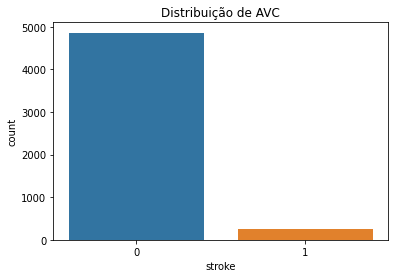

In [ ]:
# Balanceamento do dataset
print(df.stroke.value_counts())
fig, ax = plt.subplots()
sns.countplot('stroke', data=df, ax=ax)
ax.set_title('Distribuição de AVC')
plt.plot()

Como podemos ver nosso dataset se encontra muito desbalanceado, pois, temos muitos exemplo da classe '0' e poucos exemplos da classe '1', quando formos testar nosso modelo, isso pode causar problemas no seu desempenho, pode ser que o modelo fique muito bom em prever as classes '0' e não consiga ter bom desempenho em prever as classes '1'. Na etapa de preparação e limpeza iremos balancear esse dataset para corrigir esse problema.

Vamos agora ver a correlação entre as variáveis.

* Analisar a correlação entre as variáveis:

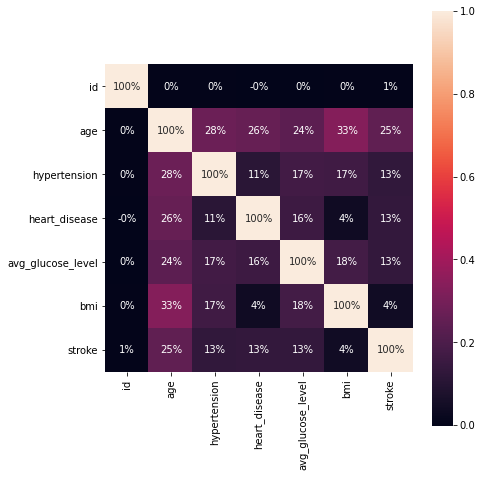

In [ ]:
# Análise da correlação entre as variáveis
corr = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Note que a correlação das outras variáveis com a variável alvo 'stroke' é pequena. A que apresentou uma maior correlação foi a variável 'age'. Quando formos preparar os dados antes de criar nosso modelo de machine learning, vamos fazer algumas alterações a fim de tentar melhorar o desempenho do modelo, como por exemplo, trocar as variáveis do tipo 'object' para variáveis do tipo numéricas; Normalizar as variáveis 'bmi' e 'avg_glucose_level'; Balancear a variável alvo, entre outros.

Após tudo isso vamos plotar uma nova matriz de correlação para verificar o que mudou.

Agora vamos entrar na segunda etapa que é a etapa de preparação e limpeza dos dados.

## Preparação e limpeza dos dados

Nessa segunda etapa, vamos fazer um trabalho de preparar os dados (por exemplo, padronizar/normalizar e balancear nossos dados, entre outros) e também um trabalho de limpeza dos dados (excluir variáveis irrelevantes, preencher valores ausentes nas entradas, entre outros).

**Vamos fazer como na primeira etapa, ir fazendo tópico a tópico tudo o que será necessário para deixar nosso dataframe pronto para alimentar nosso modelo de machine learning na etapa posterior.**

Vamos começar criando uma cópia do nosso dataframe

* Criar uma cópia do dataframe


In [ ]:
# Criar uma cópia do dataset
df_clean = df.copy()

* Eliminar as colunas que não irão ter utilidade para nosso modelo

In [ ]:
# Eliminar colunas que não contém informações úteis para o modelo
df_clean = df_clean.drop(["id"], axis = 1)

Como vimos na análise exploratória, no tópico da correlação entre as variáveis, a variável id não apresentava nenhuma correlação relevante com as outras variáveis, já que ela é apenas um identificador do paciente, podendo assim ser eliminada sem nenhum prejuízo ao desempenho do modelo, pelo contrário, isso será benéfico ao modelo.

Vamos agora verificar como ficou nosso dataframe sem a coluna 'id'

* Verificar as 05 primeiras entradas

In [ ]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Vamos agora eliminar os valores ausentes do nosso dataset. Os valores ausentes são os que vem com uma entrada representadas por 'NaN'. Conforme vimos na análise exploratória, a unica variável que apresentada valores ausentes é a 'bmi'. Vamos então substituir esses valores pela média ou pela mediana de seus valores (nesse caso a média e a mediana possuem valores próximos, geralmente é mais utilizado a mediana, pois, a mesma é menos sensível a presença de outliers que podem diminuir o desempenho do nosso modelo).

**Vamos optar por substituir pela mediana.**

* Substituindo os valores ausentes 

In [ ]:
# Substituir valores ausentes na variável 'bmi'
from sklearn.impute import SimpleImputer
num_df = df_clean.select_dtypes(exclude='object').columns

df_clean.bmi.fillna(value=0, inplace=True)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# Verificar os valores ausentes
df_clean.isnull().sum() / df_clean.shape[0]

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Conforme vimos acima, agora todo o nosso dataframe está completo sem nenhum valor ausente.

Vamos agora alterar as variáveis categóricas para númericas, bem como, separa-las em valores discretos para melhor desempenho do modelo

* Alterar as variáveis categóricas e separa-las em valores discretos

In [ ]:
# Alterar as variáveis categóricas para numéricas
# Colunas a serem transformadas em binárias
object_cols_bin = ['ever_married' , 'Residence_type']

# Criar uma cópia do dataframe
df_mod = df_clean.copy()

# 1. Transformar as variáveis binárias
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols_bin:
  df_mod[col] = label_encoder.fit_transform(df_mod[col])

# 2. Transformar as variáveis não binárias
object_cols_nbin = ['gender' , 'smoking_status' , 'work_type']
df_mod_2 = df_mod[object_cols_nbin]
df_mod_2 = pd.get_dummies(df_mod)

# 3. Excluir as colunas não binárias do df_mod
df_mod = df_mod.drop(columns=['gender' , 'smoking_status' , 'work_type'])

#4. Unir os dois dataframes formados
df_final = pd.merge(df_mod , df_mod_2)
df_final.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,1,1,228.69,36.6,1.0,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0.0,0.0,1,0,202.21,0.0,1.0,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0.0,1.0,1,0,105.92,32.5,1.0,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0.0,0.0,1,1,171.23,34.4,1.0,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1.0,0.0,1,0,174.12,24.0,1.0,1,0,0,0,0,0,1,0,0,0,1,0


**Veja como ficou nosso novo dataframe que será utilizado para alimentar nosso modelo de machine learning na próxima etapa.**

* Verificar os tipos das variáveis

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   float64
 2   heart_disease                   5110 non-null   float64
 3   ever_married                    5110 non-null   int64  
 4   Residence_type                  5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   float64
 8   gender_Female                   5110 non-null   uint8  
 9   gender_Male                     5110 non-null   uint8  
 10  gender_Other                    5110 non-null   uint8  
 11  work_type_Govt_job              5110 non-null   uint8  
 12  work_type_Never_worked          51

**Observe que agora, todas as variáveis foram definidas para numéricas.**

Vamos agora plotar a nossa nova matriz de correlação e comparar com a última que plotamos na análise exploratória.

* Plotar nova matriz de correlação

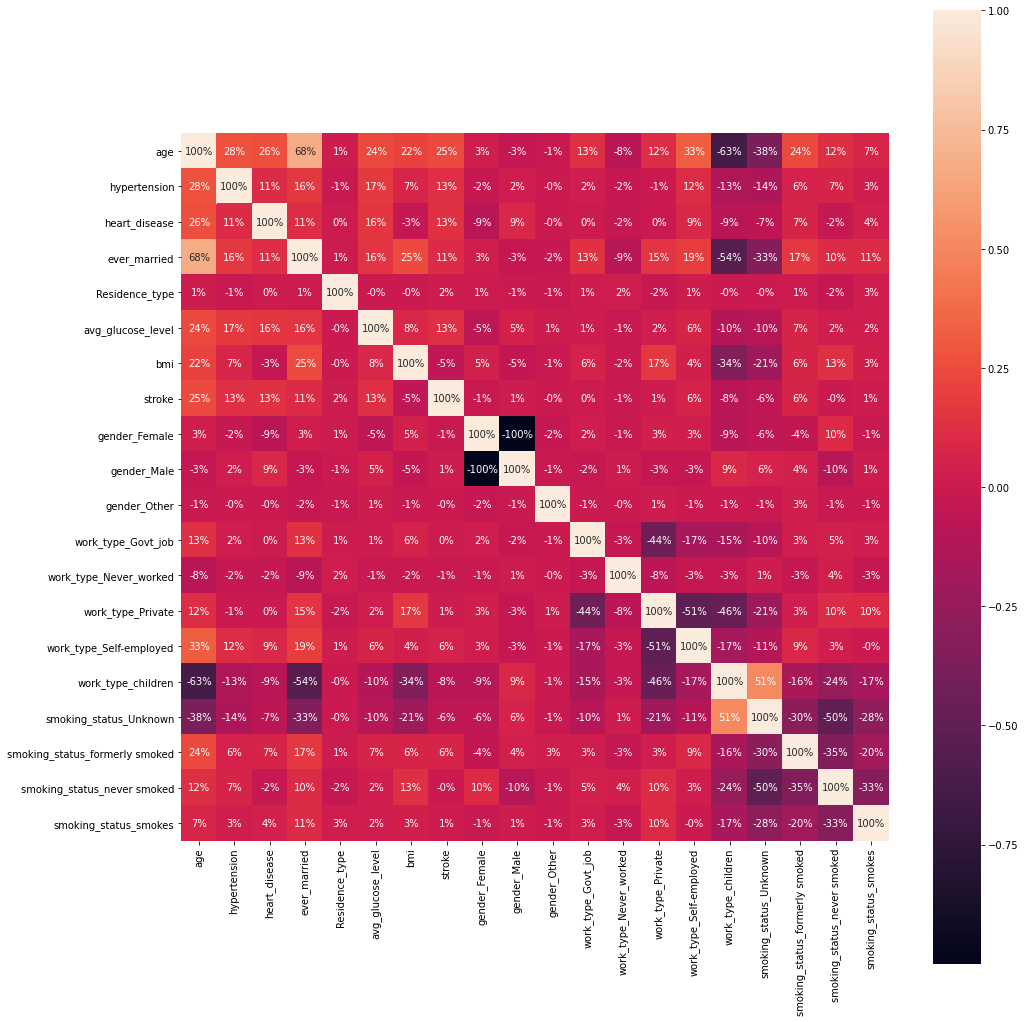

In [ ]:
# Análise da correlação entre as variáveis
corr = df_final.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Nossos dados estão praticamente prontos para alimentarem o nosso modelo de machine learning que será feito na próxima etapa. Ainda nessa etapa iremos fazer uma padronização e balanceamento das nossas variáveis, porém, antes, quero já montar um modelo bem simples antes de fazer essas etapas para obter os resultados do mesmo e assim termos condições de comparar os resultados entre esse modelo mais simples e o modelo final que será feito na etapa posterior.

Vamos utilizar a cross-validation para quantificar esse desempenho para depois compararmos com o modelo final e ver o quanto melhorou. Essa costuma ser uma boa prática para modelos de machine learning, pois, dessa forma, você tem um modelo base para comparar com quaisquer outros que virem em etapas posteriores.

Após treinarmos e quantificarmos esse modelo mais simples, ainda nessa etapa,  iremos fazer uma série de testes com várias possibilidades de padronização e balanceamento para escolher a técnica que terá um melhor desempenho para o modelo.

**E por fim, com a técnica de padronização e balanceamento escolhidas, iremos escolher o nosso modelo final.**

Vamos inicialmente utilizar apenas uma técnica simples de padronização para evitar erros muito grandes no nosso modelo.



### Modelo base - regressão logística

Vamos utilizar para esse primeiro modelo base a regressão logística, pois, é um modelo simples e rápido de ser executado. Para medir o desempenho do modelo vamos utilizar aqui o **F1-score**, pois, ele engloba em sua fórmula tanto a métrica de **Precisão** quanto a métrica do **Recall**, e portanto, para obtermos um F1-score satisfatório ambas as métricas de precisão e recall também precisam ser satisfatórias.

Não iremos utilizar a **Acurácia** aqui, pois, como o dataset está desbalanceado, e caso nosso modelo não conseguir prever nenhuma classe '1', a acurácia continuaria com um valor alto, mascarando então nossos resultados, diferentemente do que acontece com as outras métricas.

In [ ]:
# Criar uma cópia do nosso modelo final
df_mod_1 = df_final.copy()

# Separar os dados entre feature matrix e target vector
X = df_mod_1.drop('stroke' , axis=1)
y = df_mod_1['stroke']

# Dividir o dataset entre treino e teste
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y)

# verificando o formato dos dados após divisão
print('Formato de X_train:', X_train.shape)
print('Formato de y_train:', y_train.shape)
print('Formato de X_test:', X_test.shape)
print('Formato de y_test:', y_test.shape)

# Padronizar os dados de treino
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

# instanciando o modelo do baseline
from sklearn.linear_model import LogisticRegression
bl_model = LogisticRegression()

# cross-validation para baseline
from sklearn.model_selection import cross_val_score
score_f0 = cross_val_score(bl_model, X_train_transformed, y_train, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f0.mean(), score_f0.std()*2))

Formato de X_train: (3832, 19)
Formato de y_train: (3832,)
Formato de X_test: (1278, 19)
Formato de y_test: (1278,)
F-1 score: 0.01 (+/-0.04)


Observe que a nossa métrica de avaliação, o F1-score, deu extremamente baixa. Provavelmente, por conta do nossos dados não terem sido balanceados (lembre-se que temos muitos exemplos da classe '0' e poucos exemplos da classe '1'), nosso modelo não consegue fazer nenhuma previsão correta para os casos em que 'y = 1' e isso implica num F1-score baixo (nesse caso o valor mínimo).

Vamos agora executar uma série de testes balanceando e padronizando nossos dados utilizando algumas técnicas existentes.

### Teste 1 - StandardScaler + RandomUnderSampling

In [ ]:
# balanceando os dados com RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
X_train_1, y_train_1 = RandomUnderSampler().fit_sample(X_train_transformed, y_train)

# cross-validation para teste 1
score_f1 = cross_val_score(bl_model, X_train_1, y_train_1, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

F-1 score: 0.76 (+/-0.06)


Note como nosso F1-score melhorou absurdamente quando balanceamos esse conjunto de dados, ou seja, nossas suposições anteriores estavam corretas!

Vamos continuar executando mais alguns testes com outras técnicas de balanceamento e padronização para tentarmos alcançar desempenhos ainda melhores.

### Teste 2 - StandardScaler + SMOTE

In [ ]:
# balanceando com SMOTE
from imblearn.over_sampling import SMOTE
X_train_2, y_train_2 = SMOTE().fit_sample(X_train_transformed , y_train)

# cross-validation para teste 2
score_f1 = cross_val_score(bl_model, X_train_2, y_train_2, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

F-1 score: 0.81 (+/-0.01)


Utilizando um balanceamento com o SMOTE (que é uma técnica de Oversampling e não Undersampling como foi utilizado no teste 1), já houve um aumento do nosso F1-score. Vamos continuar com os testes.

### Teste 3 - MinMaxScaler + RandomUnderSampler

In [ ]:
# Normalizando com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(X_train)
X_train_mm = minmax.transform(X_train)

# balanceando com RandomUnderSampler
X_train_3, y_train_3 = RandomUnderSampler().fit_sample(X_train_mm, y_train)

# cross-validation para teste 3
score_f1 = cross_val_score(bl_model, X_train_3, y_train_3, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

F-1 score: 0.78 (+/-0.06)


Obtivemos o mesmo desempenho do teste 1. Vamos para um último teste.

### Teste 4 - MinMaxScaler + SMOTE

In [ ]:
# balanceando com SMOTE
X_train_4, y_train_4 = SMOTE().fit_sample(X_train_mm,y_train)

# cross-validation para teste 4
score_f1 = cross_val_score(bl_model, X_train_4, y_train_4, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F-1 score: 0.80 (+/-0.01)


Todos deram resultados semelhantes. Apesar do teste 4 ter dado um desempenho superior, irei seguir com o teste 1, pois, acredito que o balanceamento com o SMOTE pode causar um overfitting no nosso modelo. 

1.0    185
0.0    185
dtype: int64


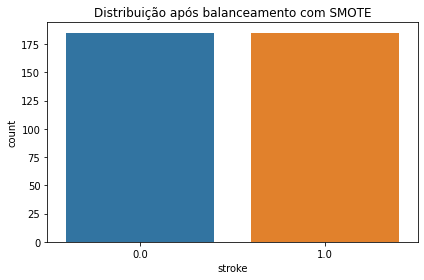

In [ ]:
# atribuindo os dados de treino final
X_train_final = X_train_1
y_train_final = y_train_1

# ver novo balanceamento
print(pd.Series(y_train_final).value_counts())

# imprimindo novo countplot
fig, ax = plt.subplots()
sns.countplot(y_train_final)
ax.set_title('Distribuição após balanceamento com SMOTE')
ax.set_xlabel('stroke')
plt.tight_layout()

## Modelo de Machine Learning

Nessa terceira e última etapa, vamos utilizar o cross-validation junto com as parametrizações do teste 2, feito na etapa anterior, para escolher o modelo que irá alcançar o melhor desempenho para então finalizarmos nosso trabalho tunando seus hyperparâmetros para tentar alcançar um desempenho ainda superior. 

Vamos adotar os seguintes modelos:

* Random forest;
* Decision tree;
* Stochastic Gradient Descent;
* SVC;
* Regressão Logística;
* XGB
* LightGBM.

In [ ]:
# Construindo função de avaliação dos modelos
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def val_model(X , y , clf , quite=False):
    X = np.array(X)
    y = np.array(y)
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X , y , scoring='f1')
    if quite == False:
        print("F1 - Score: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    return scores.mean()

# 1. Instanciar os modelos
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
model = []
f1 = []

# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    f1.append(val_model(X_train_final, y_train_final, clf, quite=True))

pd.DataFrame(data=f1, index=model, columns=['F1-Score'])

,F1-Score
RandomForestClassifier,0.747416
DecisionTreeClassifier,0.675785
SGDClassifier,0.731225
SVC,0.776422
LogisticRegression,0.762476
XGBClassifier,0.735399
LGBMClassifier,0.715506


Finalmente, o modelo que atingiu melhor desempenho foi o SVC, porém, vou seguir com o Random Forest, pois, acredito que tunando seus hyperparâmetros ele possa vir a ter um desempenho melhor que o SVC ou a regressão logística, que também deu um valor alto.

Depois, para finalizar, vamos expor nosso modelo aos dados de teste para avaliar seu desempenho com dados que ele nunca viu antes, e, assim analisar se nosso modelo realmente está generalizando para dados que ele nunca teve contato.

Vamos lá!

### Modelo final - Random Forest

Tentaremos aqui otimizar os seguintes hyperparâmetros:

* n_estimators = número de árvores na previsão;
* max_features = número máximo de recursos considerados para dividir um nó;
* max_depth = número máximo de níveis em cada árvore de decisão;
* min_samples_split = número mínimo de pontos de dados colocados em um nó antes que o nó seja dividido;
* min_samples_leaf = número mínimo de pontos de dados permitidos em um nó folha;
* bootstrap = método para amostragem de pontos de dados (com ou sem substituição);

In [ ]:
# 1. Avaliação do hyperparâmetro 'n_estimators'
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {'n_estimators':[50, 100, 300, 500]}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7620870357712464 para {'n_estimators': 500}


In [ ]:
# 2. Avaliação do hyperparâmetro 'max_features'
rf = RandomForestClassifier(n_estimators=500)
param_grid = {'max_features':['auto', 'sqrt', 'log2']}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7608469631755141 para {'max_features': 'auto'}


In [ ]:
# 3. Avaliação do hyperparâmetro 'max_depth'
rf = RandomForestClassifier(n_estimators=500 , max_features='auto')
param_grid = {'max_depth':[10, 50, 100, 500]}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7625986868603919 para {'max_depth': 10}


In [ ]:
# 4. Avaliação do hyperparâmetro 'min_samples_split'
rf = RandomForestClassifier(n_estimators=500 , max_features='auto' , max_depth=10)
param_grid = {'min_samples_split':[1 , 2 , 3 , 4 , 5]}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7899770967535698 para {'min_samples_split': 5}


In [ ]:
# 5. Avaliação do hyperparâmetro 'min_samples_leaf'
rf = RandomForestClassifier(n_estimators=500 , max_features='auto' , max_depth=10 , min_samples_split=5)
param_grid = {'min_samples_leaf':[1 , 1.3 , 1.8 , 2]}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7863980923286915 para {'min_samples_leaf': 2}


In [ ]:
# 6. Avaliação do hyperparâmetro 'bootstrap'
rf = RandomForestClassifier(n_estimators=500 , max_features='auto' , max_depth=10 , min_samples_split=5 , min_samples_leaf=2)
param_grid = {'bootstrap':[True , False]}
kfold = StratifiedKFold(n_splits=5 , shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_final , y_train_final)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7835877768418676 para {'bootstrap': True}


Conseguimos melhorar significativamente o nosso desempenho!

Vamos agora, finalmente, expor nosso modelo aos dados de teste e avaliar seu desempenho.

**Verificação final com os dados de teste**

              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82      1214
         1.0       0.14      0.89      0.23        64

    accuracy                           0.71      1278
   macro avg       0.56      0.79      0.53      1278
weighted avg       0.95      0.71      0.79      1278



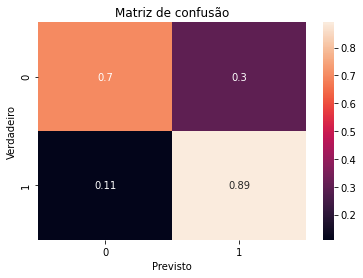

AUC: 0.7950



In [ ]:
# Modelo final
rf = RandomForestClassifier(n_estimators=500 , max_features='auto' , max_depth=10 , min_samples_split=5 , min_samples_leaf=2 , bootstrap=True)
rf.fit(X_train_final , y_train_final)

# Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)
y_pred = rf.predict(X_test)

# Imprimir relatório de classificação
print(classification_report(y_test , y_pred))

# Plotar matriz de confusão
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()

# imprimir a área sob a curva
from sklearn.metrics import roc_auc_score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

**Vamos analisar o resultado: Em primeiro lugar, gostaria de dizer que cada tipo de problema tem sua interpretação particular, vamos portanto, analisar somente este caso.**

O valor principal que é o verdadeiro positivo (VP) aprensentou um desempenho muito bom de 89%, ou seja, nosso modelo está prevendo os casos de VP 89% das vezes corretamente. O seu valor complementar que é o falso negativo, aprensentou um desempenho de 11% o que é ruim, pois, nosso modelo previu que o paciente não irá ter AVC quando na verdade ele irá ter um AVC 11% das vezes. O ideal seria que esse 11% fosse a 0, mas sabemos que na prática todos os modelos aprensentam algum tipo de erro e esses 11% são a minoria, portanto nosso modelo está bem "melhor" do que "pior".

O segundo valor principal que é o verdadeiro negativo (VN) também aprensentou um desempenho bom de 70%, ou seja, nosso modelo está prevendo os casos de VN 70% das vezes corretamente. O seu valor complementar que é o falso positivo, está alto, com um valor de 30% (o que não é interessante), porém, isso não é tão ruim quanto os casos de falso negativo, pois, o modelo detecta um AVC quando na verdade o paciente não tem AVC, ou seja, na prática irá ficar "tudo bem".

## Conclusão

Neste trabalho passamos por diversas etapas **essenciais** para qualquer pessoa que trabalhe com dados. Começamos com uma introdução para situar o problema, depois, adquirimos os dados, após isso começamos uma análise exploratória importantíssima para chegarmos onde queríamos, depois fizemos toda uma preparação e limpeza dos dados que eu, particularmente, julgo ser a etapa mais importante devido o seu nível de dificuldade e importância para um bom funcionamento do modelo de Machine Learning e enfim criamos nosso modelo final e tunamos os seus hyperparâmetros para expor ele aos testes finais tentando buscar sempre um melhor desempenho e, por fim, tirar nossas conclusões.

É possível, claro, fazer ainda mais melhorias com mais testes de pré-processamento e também de tunning de hyperparâmetros de outros modelos e até utilizar modelos mais robustos como por exemplo uma rede neural.

Vou deixar isso para uma próxima oportunidade! Espero ter ajudado a melhorar seu conhecimento!

**Obrigado por nos acompanhar até aqui!**